## 1. Import Section

#### importing necessary python module 

In [1]:
#Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
import os
print(os.listdir())
warnings.filterwarnings('ignore')
%matplotlib inline

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

['heart_disease_21012020.csv', 'thesis.ipynb', 'older', 'heart_disease_data.csv', '.ipynb_checkpoints']


#### dataset import

In [2]:
dataset = pd.read_csv("heart_disease_data.csv")

In [3]:
dataset.shape

(59, 19)

In [4]:
dataset

,age,sex,occupation,family_history,smoking,obesity,diet,physical_activity,stress,chest_pain_type,previous_chest_pain,edema,bp_systolic,bp_diastolic,heart_rate,diabetes,troponin,ecg,target
0,60,male,farmer,no,yes,no,normal,yes,normal,typical,no,no,115.0,75.0,80.0,yes,negative,normal,0
1,54,male,businessman,no,yes,no,normal,no,normal,atypical,no,no,140.0,90.0,150.0,no,negative,abnormal,1
2,45,male,driver,brother,yes,no,normal,yes,high,typical,yes,no,90.0,60.0,70.0,no,positive,normal,1
3,60,male,nothing,no,no,no,normal,no,normal,non,yes,no,140.0,90.0,131.0,no,negative,abnormal,0
4,52,male,nothing,no,yes,no,normal,no,high,typical,no,no,105.0,60.0,75.0,no,positive,normal,1
5,60,male,serviceholder,no,no,no,normal,no,normal,non,no,no,110.0,65.0,59.0,no,negative,abnormal,0
6,84,male,farmer,son,yes,no,abnormal,no,high,atypical,no,no,130.0,90.0,75.0,no,positive,abnormal,1
7,65,male,farmer,no,yes,yes,normal,no,normal,typical,no,yes,140.0,95.0,NaN,no,positive,abnormal,1
8,42,male,worker,no,yes,no,abnormal,yes,high,atypical,no,no,120.0,80.0,108.0,no,positive,abnormal,1
9,55,male,serviceholder,no,no,no,abnormal,yes,high,typical,no,no,150.0,92.0,100.0,yes,negative,abnormal,1


In [5]:
dataset.describe()

,age,bp_systolic,bp_diastolic,heart_rate,target
count,59.000000,46.000000,46.000000,47.000000,59.000000
mean,57.762712,128.260870,77.869565,83.957447,0.610169
std,15.873790,24.065129,15.445400,22.706021,0.491898
min,26.000000,75.000000,50.000000,54.000000,0.000000
25%,49.000000,110.000000,66.250000,70.500000,0.000000
50%,60.000000,130.000000,75.000000,76.000000,1.000000
75%,65.000000,143.750000,90.000000,90.000000,1.000000
max,90.000000,180.000000,120.000000,165.000000,1.000000


In [6]:
# dataset.profile_report(style={'full_width':True})

In [7]:
# rcParams['figure.figsize'] = 10, 10
# for i in dataset.columns:
#    bar_chart(i)

## 2. Pre-Processing/Cleaning

#### handle named value by mapping

In [8]:
sex_mapping = {"male": 0, "female": 1}
dataset['sex'] = dataset['sex'].map(sex_mapping)

occupation_mapping = {"nothing": 0, "farmer": 1, "businessman": 2, "driver": 3, "serviceholder": 4,
       "worker": 5, "housewife": 6, "military": 7, "doctor": 8}
dataset['occupation'] = dataset['occupation'].map(occupation_mapping)

family_history_mapping = {"no": 0, "father": 1, "brother": 2, "son": 3}
dataset['family_history'] = dataset['family_history'].map(family_history_mapping)

smoking_mapping = {"no": 0, "yes": 1}
dataset['smoking'] = dataset['smoking'].map(smoking_mapping)

obesity_mapping = {"no": 0, "yes": 1}
dataset['obesity'] = dataset['obesity'].map(obesity_mapping)

diet_mapping = {"normal": 0, "abnormal": 1}
dataset['diet'] = dataset['diet'].map(diet_mapping)

physical_activity_mapping = {"no": 0, "yes": 1}
dataset['physical_activity'] = dataset['physical_activity'].map(physical_activity_mapping)

stress_mapping = {"normal": 0, "high": 1}
dataset['stress'] = dataset['stress'].map(stress_mapping)

chest_pain_type_mapping = {"typical": 0, "atypical": 1, "asymptomatic": 2, "non": 3}
dataset['chest_pain_type'] = dataset['chest_pain_type'].map(chest_pain_type_mapping)

previous_chest_pain_mapping = {"no": 0, "yes": 1}
dataset['previous_chest_pain'] = dataset['previous_chest_pain'].map(previous_chest_pain_mapping)

edema_mapping = {"no": 0, "yes": 1}
dataset['edema'] = dataset['edema'].map(edema_mapping)

diabetes_mapping = {"no": 0, "yes": 1}
dataset['diabetes'] = dataset['diabetes'].map(diabetes_mapping)

troponin_mapping = {"negative": 0, "positive": 1}
dataset['troponin'] = dataset['troponin'].map(troponin_mapping)

ecg_mapping = {"undefined": 0, "normal": 1, "abnormal": 2}
dataset['ecg'] = dataset['ecg'].map(ecg_mapping)


#### handle missing values

In [9]:
dataset.isnull().sum()

age                     0
sex                     0
occupation              0
family_history          0
smoking                 0
obesity                 0
diet                    0
physical_activity       0
stress                  0
chest_pain_type         0
previous_chest_pain     0
edema                   0
bp_systolic            13
bp_diastolic           13
heart_rate             12
diabetes                0
troponin                8
ecg                     0
target                  0
dtype: int64

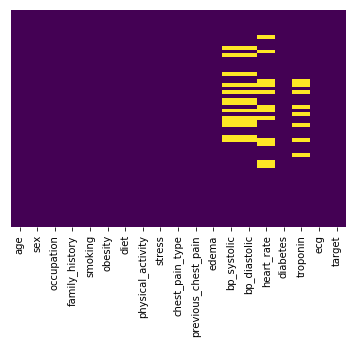

In [10]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [11]:
# impute missing numerical values with median of the column

dataset["bp_systolic"].fillna(dataset.groupby("sex")["bp_systolic"].transform("median"), inplace=True)
dataset["bp_diastolic"].fillna(dataset.groupby("sex")["bp_diastolic"].transform("median"), inplace=True)
dataset["heart_rate"].fillna(dataset.groupby("sex")["heart_rate"].transform("median"), inplace=True)

In [12]:
# impute missing numerical values with mode of the column

dataset.troponin.fillna(dataset.troponin.mode()[0], inplace=True)

# impute missing categorical values with prediction

knn_classifier_ecg = KNeighborsClassifier(n_neighbors = 3)

data_ecg = dataset[['age', 'sex', 'occupation', 'smoking', 'obesity', 'diet', 'physical_activity', 'stress', 
                'chest_pain_type', 'previous_chest_pain', 'edema', 'bp_systolic', 'bp_diastolic', 'heart_rate'
                , 'diabetes', 'troponin', 'ecg']]

X_train_ecg = data_ecg[data_ecg['ecg'].notnull()].drop(columns='ecg')
y_train_ecg = data_ecg[data_ecg['ecg'].notnull()]['ecg']
X_test_ecg = data_ecg[data_ecg['ecg'].isnull()].drop(columns='ecg')
y_test_ecg = data_ecg[data_ecg['ecg'].isnull()]['ecg']

knn_classifier_ecg.fit(X_train_ecg, y_train_ecg)
predicted_ecg = knn_classifier_ecg.predict(X_test_ecg)

dataset.ecg[dataset.ecg.isnull()] = predicted_ecg

In [13]:
dataset.isnull().sum()

age                    0
sex                    0
occupation             0
family_history         0
smoking                0
obesity                0
diet                   0
physical_activity      0
stress                 0
chest_pain_type        0
previous_chest_pain    0
edema                  0
bp_systolic            0
bp_diastolic           0
heart_rate             0
diabetes               0
troponin               0
ecg                    0
target                 0
dtype: int64

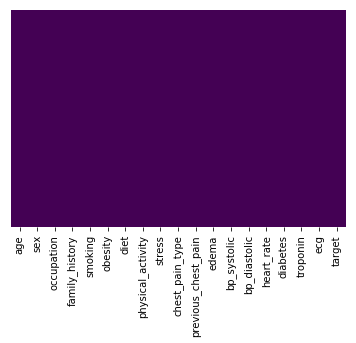

In [14]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## 3. Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c4e441358>,
      dtype=object)

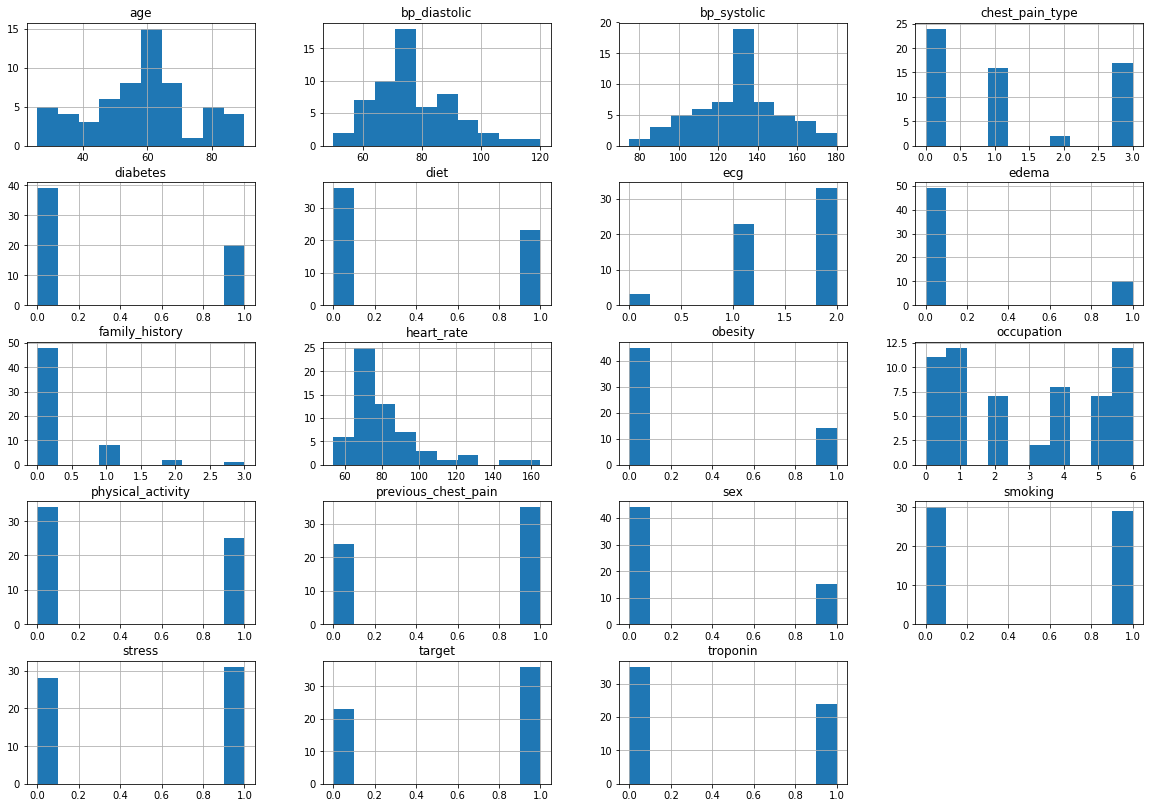

In [15]:
rcParams['figure.figsize'] = 20, 14
dataset.hist()

In [16]:
def bar_chart(feature):
    heart_disease = dataset[dataset['target']==1][feature].value_counts()
    not_heart_disease = dataset[dataset['target']==0][feature].value_counts()
    df = pd.DataFrame([heart_disease, not_heart_disease])
    df.index = ['heart_disease','not_heart_disease']
    df.plot(title= feature, kind='bar',stacked=True, figsize=(8,4))

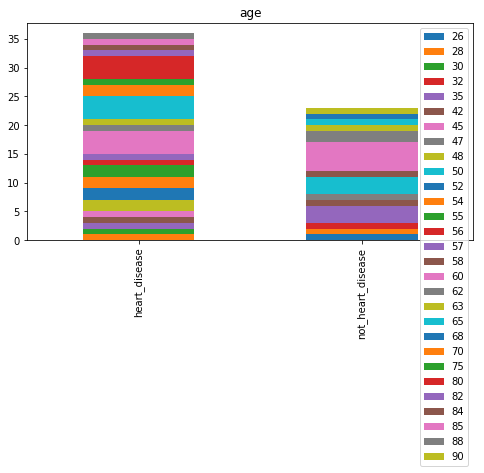

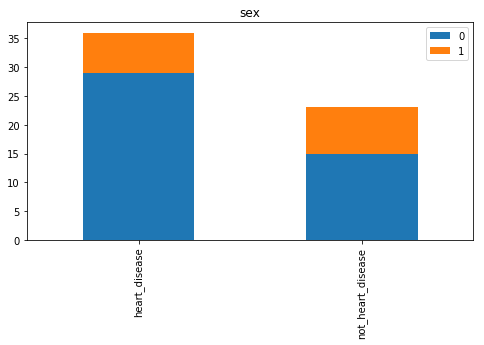

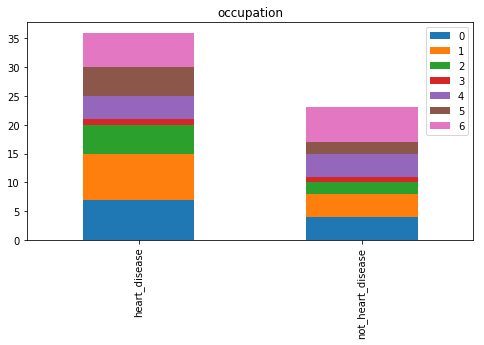

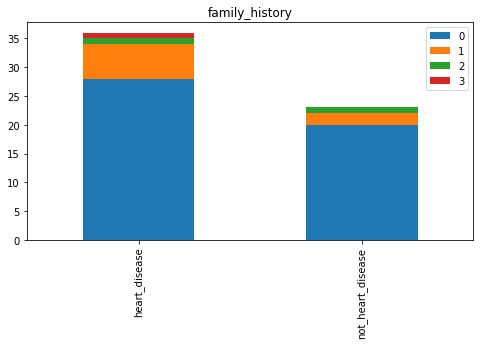

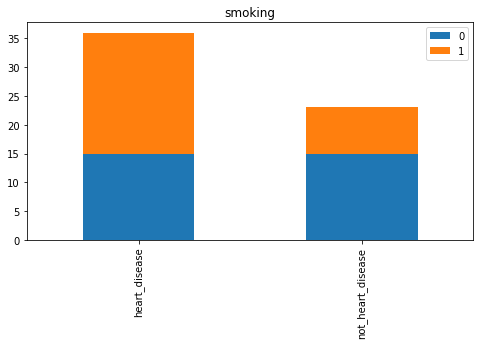

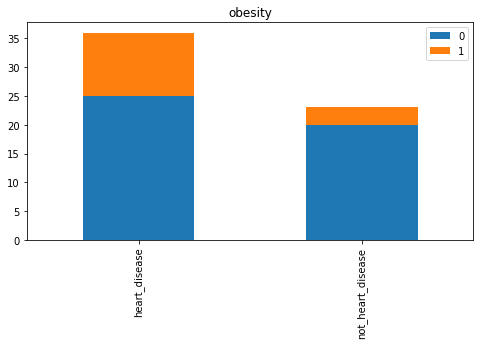

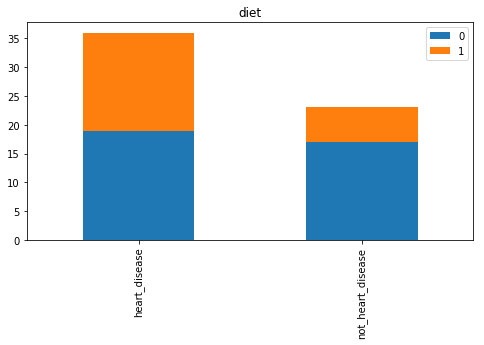

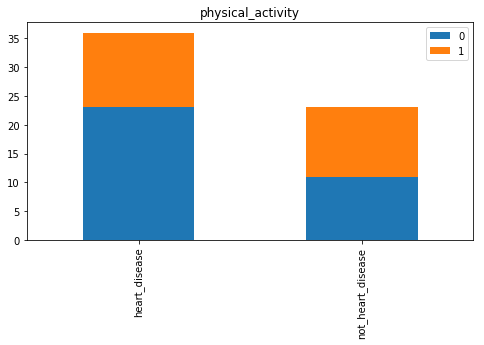

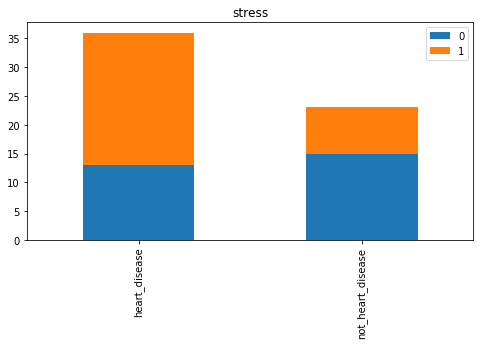

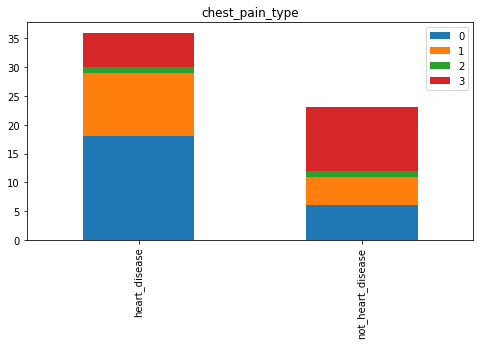

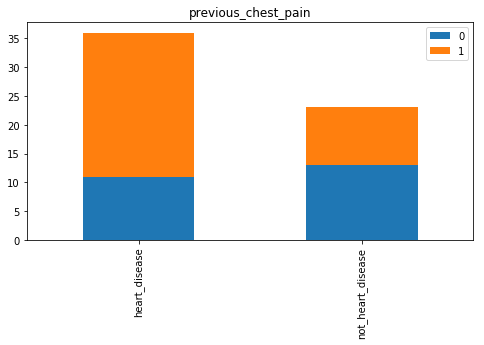

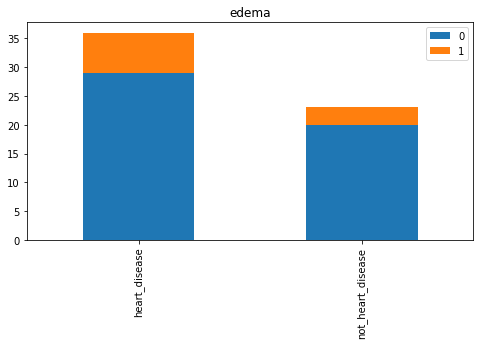

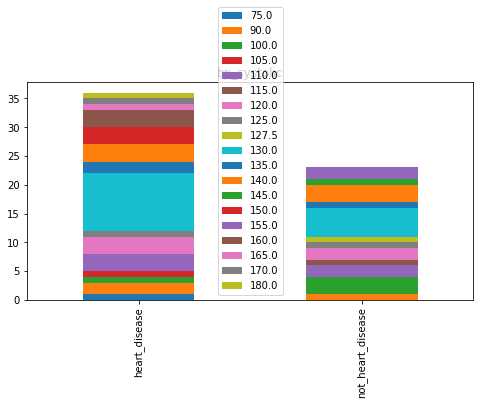

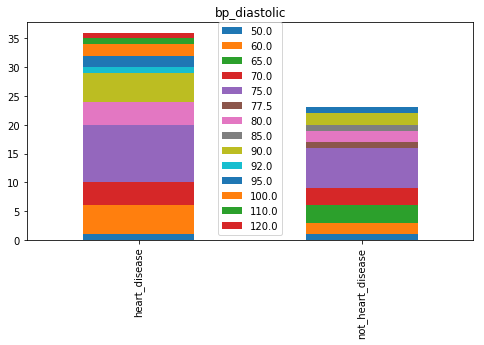

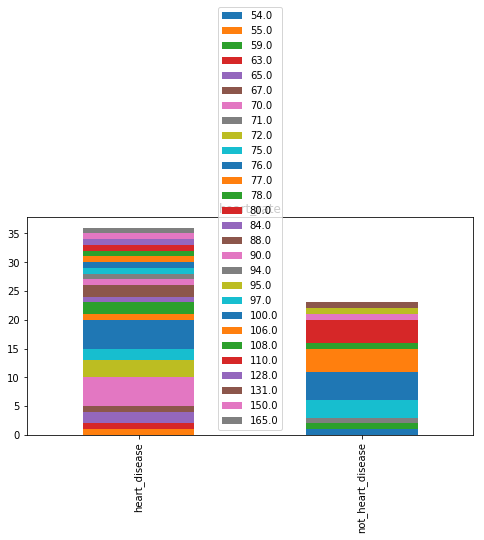

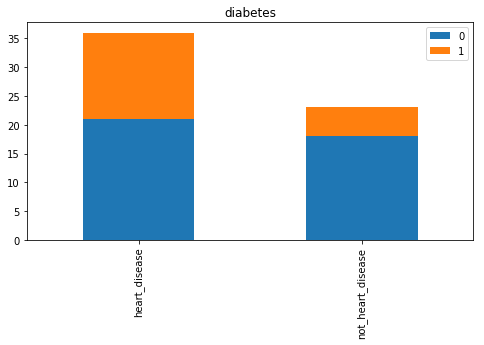

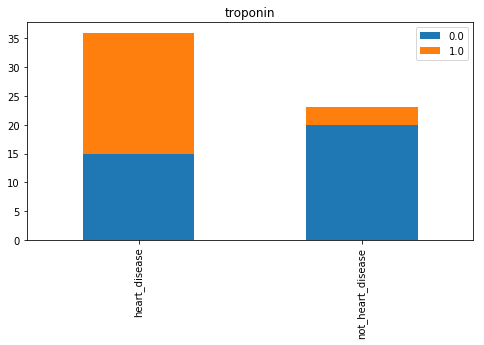

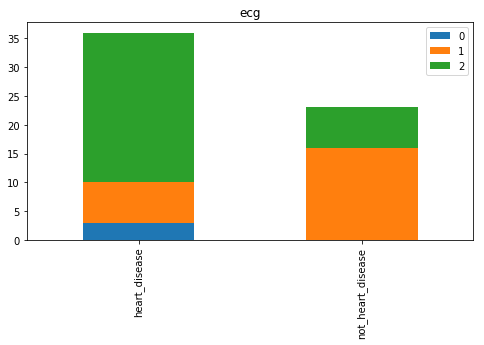

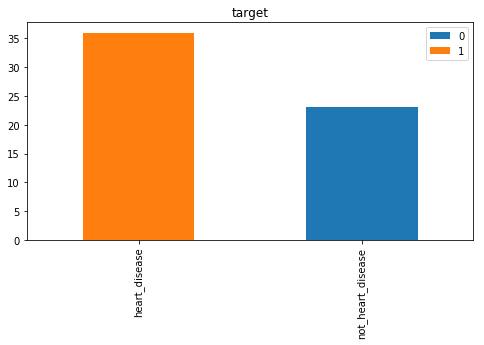

In [17]:
rcParams['figure.figsize'] = 10, 10
for i in dataset.columns:
    bar_chart(i)

In [18]:
def facet_grid(feature):
    facet = sns.FacetGrid(dataset, hue="target",aspect=4)
    facet.map(sns.kdeplot, feature, shade= True)
    facet.set(xlim=(0, dataset[feature].max()))
    facet.add_legend() 
    plt.show()

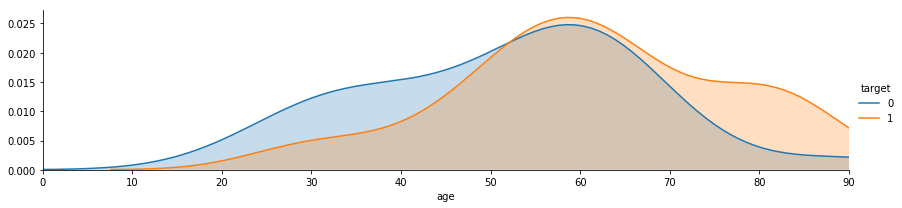

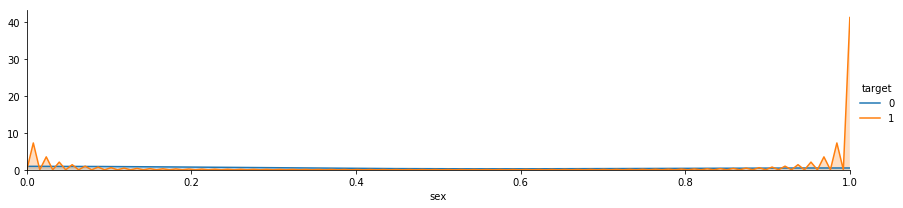

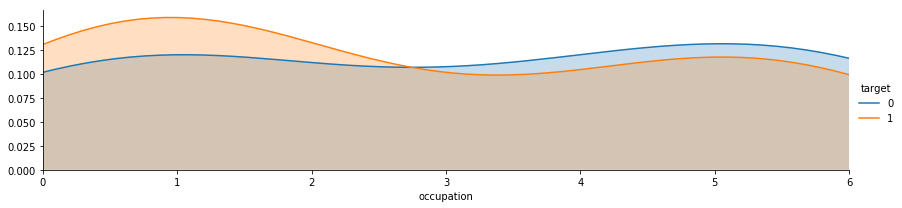

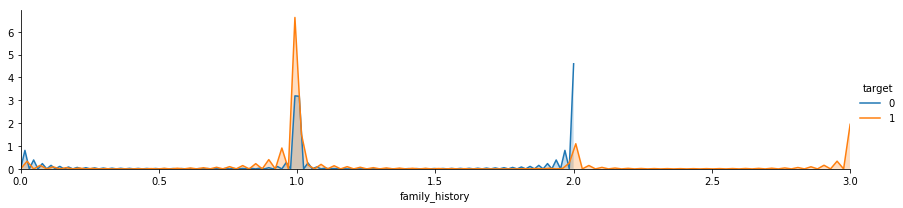

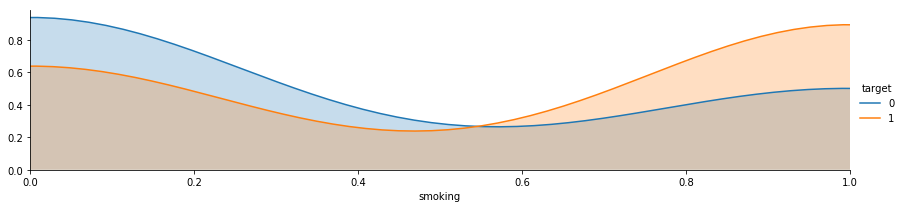

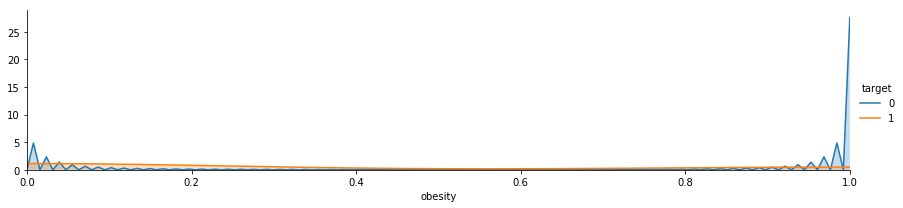

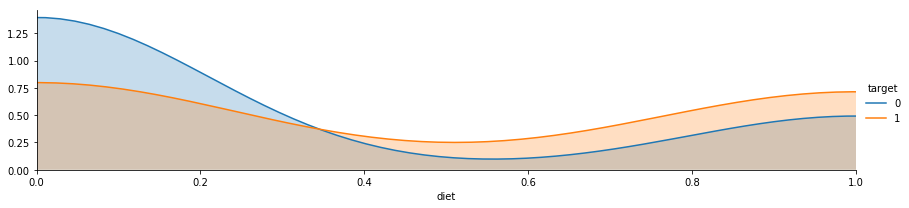

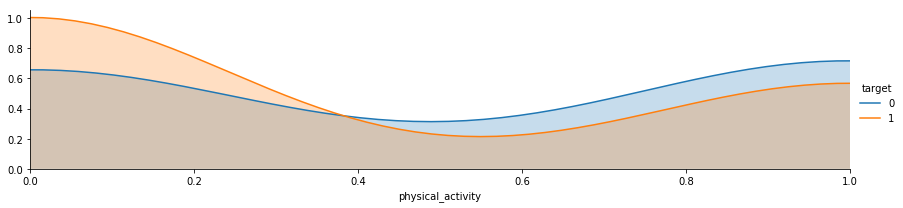

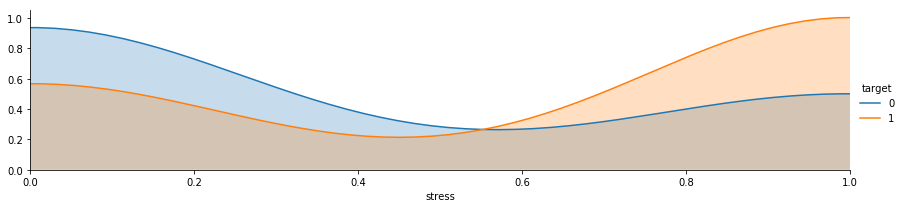

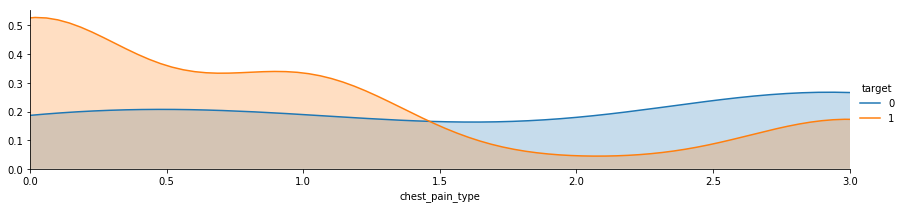

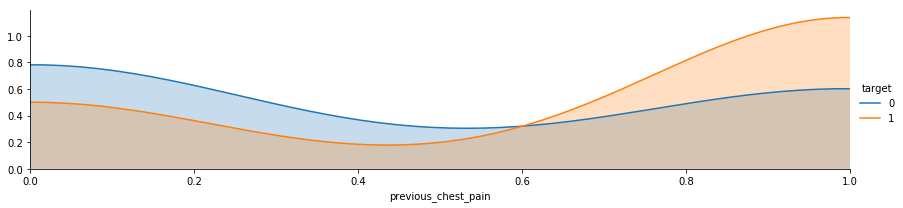

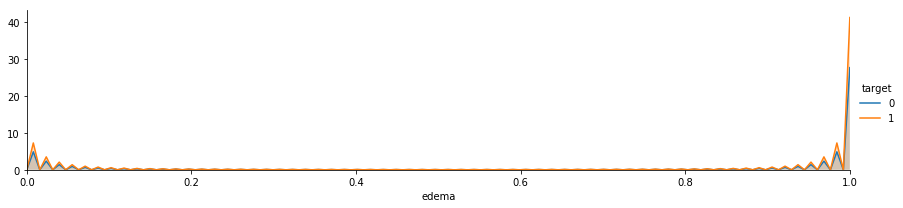

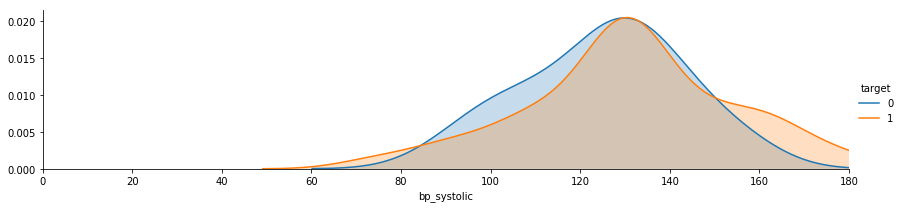

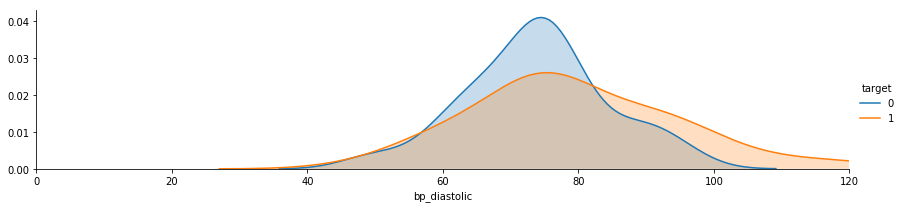

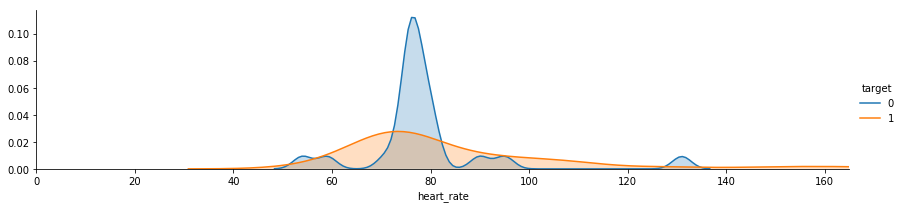

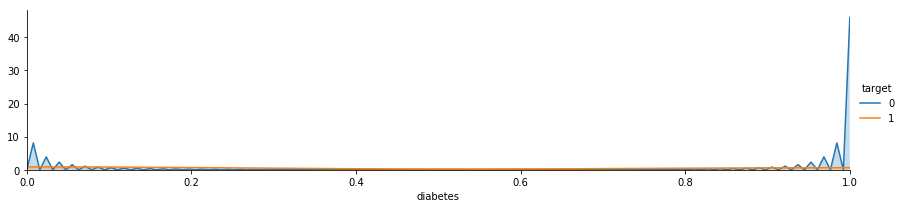

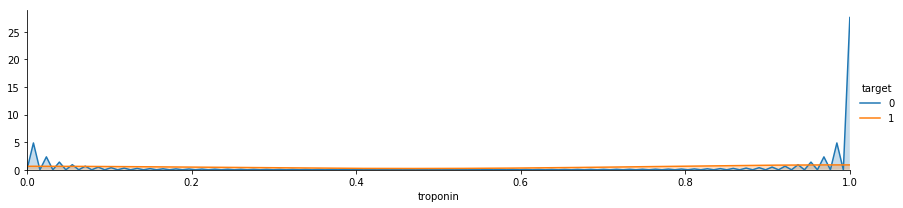

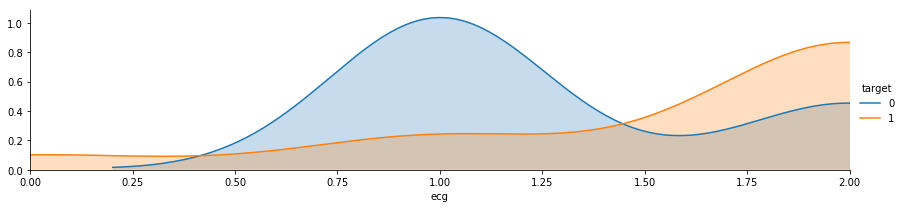

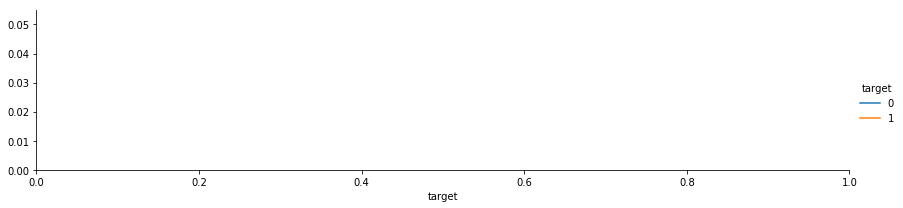

In [19]:
rcParams['figure.figsize'] = 10, 10
for i in dataset.columns:
    facet_grid(i)

## 4. Feature engineering

#### correlation checking

In [20]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
troponin               0.449652
chest_pain_type        0.343749
age                    0.288249
stress                 0.284277
ecg                    0.275153
previous_chest_pain    0.257800
smoking                0.229752
diet                   0.211353
diabetes               0.205315
bp_diastolic           0.205186
obesity                0.200762
sex                    0.171797
physical_activity      0.158536
heart_rate             0.145232
bp_systolic            0.132768
family_history         0.107141
occupation             0.098122
edema                  0.083208
Name: target, dtype: float64


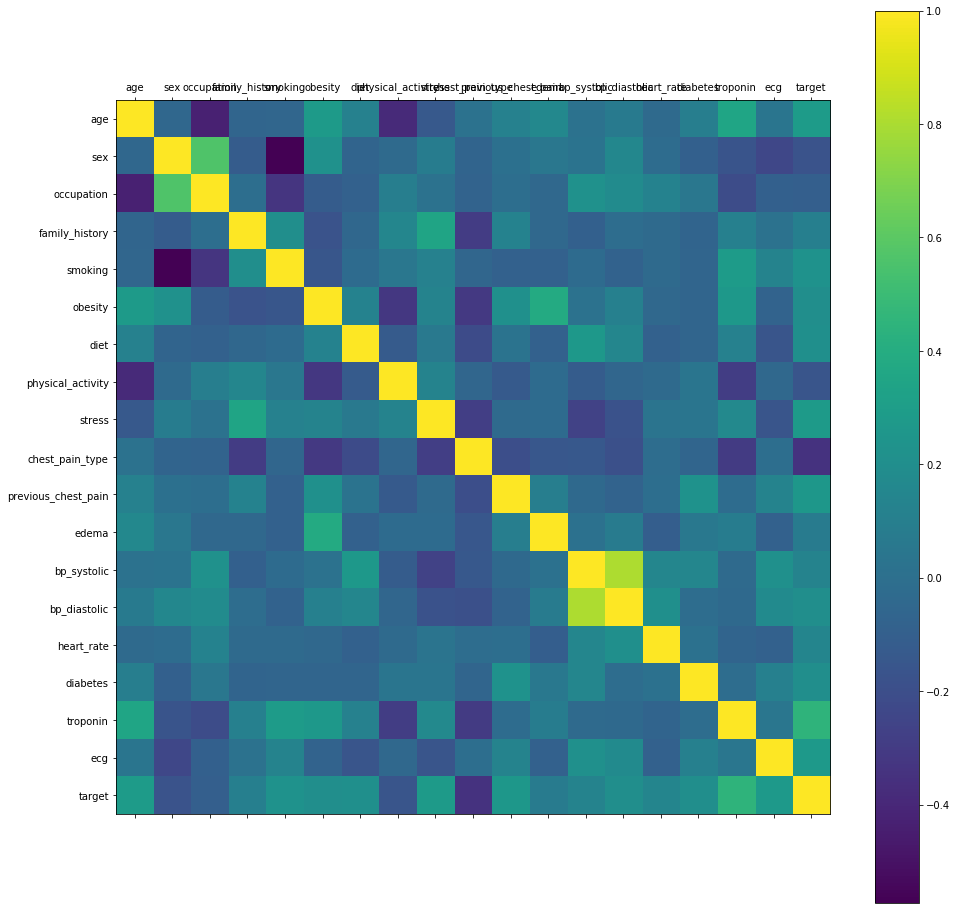

In [21]:
rcParams['figure.figsize'] = 42, 42
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


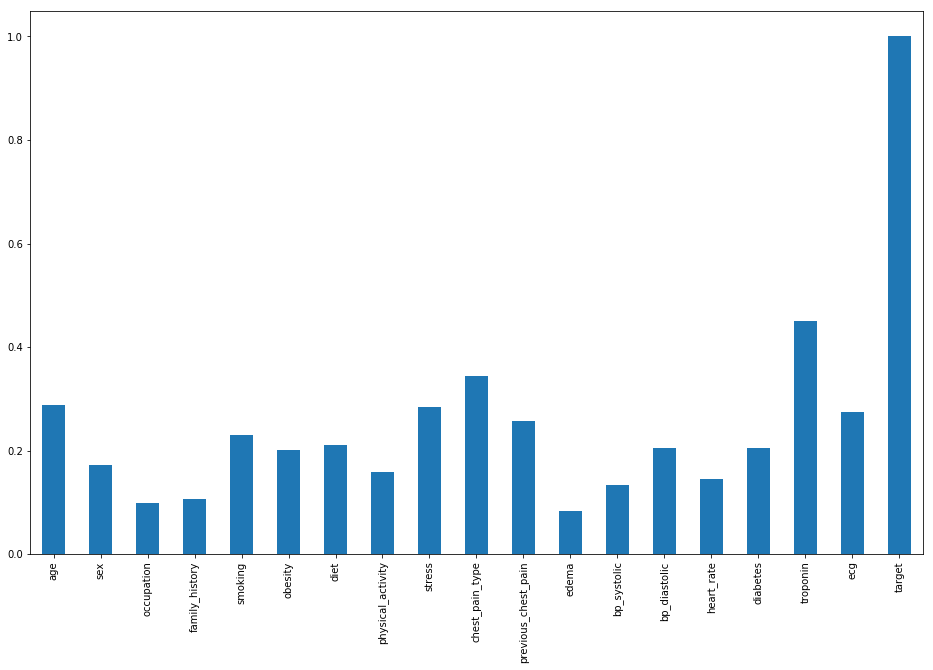

In [22]:
rcParams['figure.figsize'] = 16, 10
dataset.corr()["target"].abs().plot(kind='bar')

#### feature selection

In [23]:
feature_selected = ['age','sex', 'smoking','obesity', 'diet', 'physical_activity', 'stress',
                'chest_pain_type' , 'previous_chest_pain', 'bp_diastolic'
                , 'diabetes', 'troponin', 'ecg','target']
data_selected = dataset[feature_selected]

In [ ]:
data_selected.shape

(59, 14)

#### convert categorical to dummies values

In [ ]:
data_selected = pd.get_dummies(data_selected, columns = ['sex', 'smoking', 'obesity', 'diet', 'physical_activity', 'stress'
                        , 'chest_pain_type', 'previous_chest_pain', 'diabetes', 'troponin', 'ecg'])

#### feature scaling

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bp_diastolic']
data_selected[columns_to_scale] = standardScaler.fit_transform(data_selected[columns_to_scale])

In [ ]:
data_selected.shape

(59, 28)

## 5. Prediction

performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

#### train test split

In [ ]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.33,random_state=0)

In [ ]:
predictors_selected = data_selected.drop("target",axis=1)
target_selected = data_selected["target"]

X_train_selected,X_test_selected,y_train_selected,y_test_selected = train_test_split(predictors_selected,target_selected,test_size=0.33,random_state=0)

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (39, 18)
X_test (20, 18)
y_train (39,)
y_test (20,)


In [ ]:
print('X_train_selected', X_train_selected.shape)
print('X_test_selected', X_test_selected.shape)
print('y_train_selected', y_train_selected.shape)
print('y_test_selected', y_test_selected.shape)

X_train_selected (39, 27)
X_test_selected (20, 27)
y_train_selected (39,)
y_test_selected (20,)


#### model fitting

In [ ]:
# for k-fold cross validation
k_fold = KFold(n_splits=8, shuffle=True, random_state=0)

#### Logistic Regression

In [ ]:
# for dataset
lr = LogisticRegression()

# f1_score_lr_kv = cross_val_score(lr, predictors, target, cv=k_fold, n_jobs=1, scoring='f1_score')
# f1_score_lr_kv = round(np.mean(f1_score_lr_kv)*100, 2)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
precision_lr = round(precision_score(y_test, y_pred_lr)*100, 2)
recall_lr = round(recall_score(y_test, y_pred_lr)*100, 2)
f1_score_lr = round(f1_score(y_test, y_pred_lr)*100, 2)
roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr)*100, 2)

print("Accuracy score of Logistic Regression: "+str(accuracy_lr)+" %")
print("Precision score of Logistic Regression: "+str(precision_lr)+" %")
print("Recall score of Logistic Regression: "+str(recall_lr)+" %")
print("F1 score of Logistic Regression: "+str(f1_score_lr)+" %")
print("ROC AUC score of Logistic Regression: "+str(f1_score_lr)+" %")

Accuracy score of Logistic Regression: 70.0 %
Precision score of Logistic Regression: 69.23 %
Recall score of Logistic Regression: 81.82 %
F1 score of Logistic Regression: 75.0 %
ROC AUC score of Logistic Regression: 75.0 %


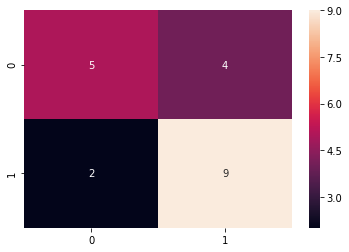

In [ ]:
rcParams['figure.figsize'] = 6, 4
matrix_lr= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr,annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.69      0.82      0.75        11

   micro avg       0.70      0.70      0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



In [ ]:
# for data_selected
lr = LogisticRegression()

# score_lr_selected = cross_val_score(lr, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_lr_selected = round(np.mean(score_lr_selected)*100, 2)

lr.fit(X_train_selected, y_train_selected)
y_pred_lr_selected = lr.predict(X_test_selected)

accuracy_lr_selected = round(accuracy_score(y_test_selected, y_pred_lr_selected)*100, 2)
precision_lr_selected = round(precision_score(y_test_selected, y_pred_lr_selected)*100, 2)
recall_lr_selected = round(recall_score(y_test_selected, y_pred_lr_selected)*100, 2)
f1_score_lr_selected = round(f1_score(y_test_selected, y_pred_lr_selected)*100, 2)
roc_auc_lr_selected = round(roc_auc_score(y_test_selected, y_pred_lr_selected)*100, 2)

print("Accuracy score of Logistic Regression: "+str(accuracy_lr_selected)+" %")
print("Precision score of Logistic Regression: "+str(precision_lr_selected)+" %")
print("Recall score of Logistic Regression: "+str(recall_lr_selected)+" %")
print("F1 score of Logistic Regression: "+str(f1_score_lr_selected)+" %")
print("ROC AUC score of Logistic Regression: "+str(f1_score_lr_selected)+" %")

Accuracy score of Logistic Regression: 75.0 %
Precision score of Logistic Regression: 75.0 %
Recall score of Logistic Regression: 81.82 %
F1 score of Logistic Regression: 78.26 %
ROC AUC score of Logistic Regression: 78.26 %


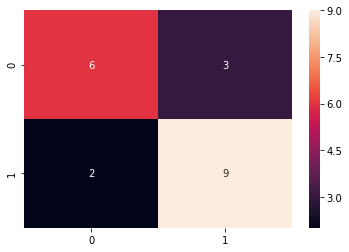

In [ ]:
matrix_lr_selected = confusion_matrix(y_test_selected, y_pred_lr_selected)
sns.heatmap(matrix_lr_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_lr_selected))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

   micro avg       0.75      0.75      0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



#### Naive Bayes

In [ ]:
# for dataset
nb = GaussianNB()

# score_nb = cross_val_score(nb, predictors, target, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_nb = round(np.mean(score_nb)*100, 2)

nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
precision_nb = round(precision_score(y_test, y_pred_nb)*100, 2)
recall_nb = round(recall_score(y_test, y_pred_nb)*100, 2)
f1_score_nb = round(f1_score(y_test, y_pred_nb)*100, 2)
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb)+" %")
print("ROC AUC score of Naive Bayes: "+str(f1_score_nb)+" %")

Accuracy score of Naive Bayes: 75.0 %
Precision score of Naive Bayes: 87.5 %
Recall score of Naive Bayes: 63.64 %
F1 score of Naive Bayes: 73.68 %
ROC AUC score of Naive Bayes: 73.68 %


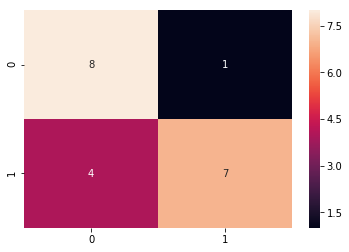

In [ ]:
matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix_nb, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

   micro avg       0.75      0.75      0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [ ]:
# for data_selected
nb = GaussianNB()

# score_nb_selected = cross_val_score(nb, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# core_nb_selected = round(np.mean(score_nb_selected)*100, 2)

nb.fit(X_train_selected, y_train_selected)
y_pred_nb_selected = nb.predict(X_test_selected)

accuracy_nb_selected = round(accuracy_score(y_test_selected, y_pred_nb_selected)*100, 2)
precision_nb_selected = round(precision_score(y_test_selected, y_pred_nb_selected)*100, 2)
recall_nb_selected = round(recall_score(y_test_selected, y_pred_nb_selected)*100, 2)
f1_score_nb_selected = round(f1_score(y_test_selected, y_pred_nb_selected)*100, 2)
roc_auc_nb_selected = round(roc_auc_score(y_test_selected, y_pred_nb_selected)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb_selected)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb_selected)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb_selected)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb_selected)+" %")
print("ROC AUC score of Naive Bayes: "+str(roc_auc_nb_selected)+" %")

Accuracy score of Naive Bayes: 70.0 %
Precision score of Naive Bayes: 77.78 %
Recall score of Naive Bayes: 63.64 %
F1 score of Naive Bayes: 70.0 %
ROC AUC score of Naive Bayes: 70.71 %


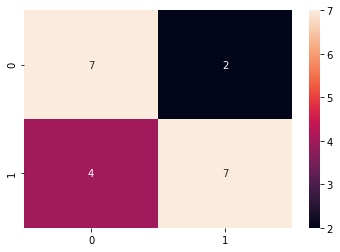

In [ ]:
matrix_nb_selected = confusion_matrix(y_test_selected, y_pred_nb_selected)
sns.heatmap(matrix_nb_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_nb_selected))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.78      0.64      0.70        11

   micro avg       0.70      0.70      0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



#### K Neighbors Classifier

In [ ]:
# for dataset
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
score_knn = round(max(knn_scores)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn)+" %")

The score for K Neighbors Classifier is: 75.0 %


In [ ]:
# print(classification_report(y_test, y_pred_knn))

In [ ]:
# for data_selected
knn_scores_selected = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_selected, y_train_selected)
    knn_scores_selected.append(knn_classifier.score(X_test_selected, y_test_selected))
score_knn_selected = round(max(knn_scores_selected)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn_selected)+" %")

The score for K Neighbors Classifier is: 85.0 %


In [ ]:
# print(classification_report(y_test_selected, y_pred_lr_selected))

#### Support Vector Classifier

In [ ]:
# for dataset
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='poly')

# score_svm = cross_val_score(nb, predictors, target, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_svm = round(np.mean(score_svm)*100, 2)

sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

accuracy_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
precision_svm = round(precision_score(y_test, y_pred_svm)*100, 2)
recall_svm = round(recall_score(y_test, y_pred_svm)*100, 2)
f1_score_svm = round(f1_score(y_test, y_pred_svm)*100, 2)
roc_auc_svm = round(roc_auc_score(y_test_selected, y_pred_svm)*100, 2)

print("Accuracy score of Linear SVM: "+str(accuracy_svm)+" %")
print("Precision score of Linear SVM: "+str(precision_svm)+" %")
print("Recall score of Linear SVM: "+str(recall_svm)+" %")
print("F1 score of Linear SVM: "+str(f1_score_svm)+" %")
print("ROC AUC score of Linear SVM: "+str(roc_auc_svm)+" %")

Accuracy score of Linear SVM: 70.0 %
Precision score of Linear SVM: 72.73 %
Recall score of Linear SVM: 72.73 %
F1 score of Linear SVM: 72.73 %
ROC AUC score of Linear SVM: 69.7 %


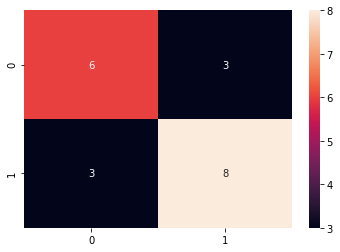

In [ ]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix_svm, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.73      0.73      0.73        11

   micro avg       0.70      0.70      0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



In [ ]:
# for data_selected
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='rbf')

# score_svm_selected = cross_val_score(nb, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_svm_selected = round(np.mean(score_svm_selected)*100, 2)

sv.fit(X_train_selected, y_train_selected)
y_pred_svm_selected = sv.predict(X_test_selected)

accuracy_svm_selected = round(accuracy_score(y_test_selected, y_pred_svm_selected)*100, 2)
precision_svm_selected = round(precision_score(y_test_selected, y_pred_svm_selected)*100, 2)
recall_svm_selected = round(recall_score(y_test_selected, y_pred_svm_selected)*100, 2)
f1_score_svm_selected = round(f1_score(y_test_selected, y_pred_svm_selected)*100, 2)
roc_auc_svm_selected = round(roc_auc_score(y_test_selected, y_pred_svm_selected)*100, 2)

print("Accuracy score of Linear SVM: "+str(accuracy_svm_selected)+" %")
print("Precision score of Linear SVM: "+str(precision_svm_selected)+" %")
print("Recall score of Linear SVM: "+str(recall_svm_selected)+" %")
print("F1 score of Linear SVM: "+str(f1_score_svm_selected)+" %")
print("ROC AUC score of Linear SVM: "+str(roc_auc_svm_selected)+" %")

Accuracy score of Linear SVM: 80.0 %
Precision score of Linear SVM: 76.92 %
Recall score of Linear SVM: 90.91 %
F1 score of Linear SVM: 83.33 %
ROC AUC score of Linear SVM: 78.79 %


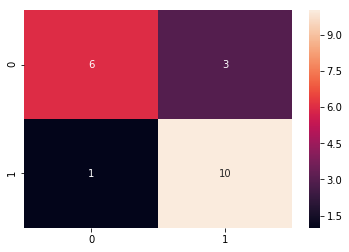

In [ ]:
matrix_svm_selected = confusion_matrix(y_test_selected, y_pred_svm_selected)
sns.heatmap(matrix_svm_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_svm_selected))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



#### Decision Tree

In [ ]:
#for dataset
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

# dt = DecisionTreeClassifier()
# score_dt = cross_val_score(dt, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt = round(np.mean(score_dt)*100, 2)

accuracy_dt = round(accuracy_score(y_test, y_pred_dt)*100, 2)
precision_dt = round(precision_score(y_test, y_pred_dt)*100, 2)
recall_dt = round(recall_score(y_test, y_pred_dt)*100, 2)
f1_score_dt = round(f1_score(y_test, y_pred_dt)*100, 2)
roc_auc_dt = round(roc_auc_score(y_test_selected, y_pred_dt)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt)+" %")
print("Precision score of Decision Tree: "+str(precision_dt)+" %")
print("Recall score of Decision Tree: "+str(recall_dt)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt)+" %")

Accuracy score of Decision Tree: 70.0 %
Precision score of Decision Tree: 69.23 %
Recall score of Decision Tree: 81.82 %
F1 score of Decision Tree: 75.0 %
ROC AUC score of Decision Tree: 68.69 %


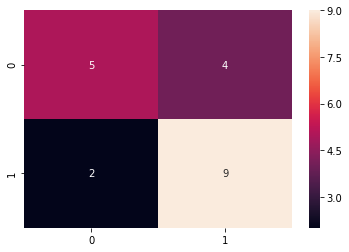

In [ ]:
matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix_dt, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.69      0.82      0.75        11

   micro avg       0.70      0.70      0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



In [ ]:
# data_selected
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_selected, y_train_selected)
    y_pred_dt_selected = dt.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_dt_selected, y_test_selected)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_selected,y_train_selected)
y_pred_dt_selected = dt.predict(X_test_selected)

# dt = DecisionTreeClassifier()
# score_dt_selected = cross_val_score(dt, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt_selected = round(np.mean(score_dt_selected)*100, 2)

accuracy_dt_selected = round(accuracy_score(y_test_selected, y_pred_dt_selected)*100, 2)
precision_dt_selected = round(precision_score(y_test_selected, y_pred_dt_selected)*100, 2)
recall_dt_selected = round(recall_score(y_test_selected, y_pred_dt_selected)*100, 2)
f1_score_dt_selected = round(f1_score(y_test_selected, y_pred_dt_selected)*100, 2)
roc_auc_dt_selected = round(roc_auc_score(y_test_selected, y_pred_dt_selected)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt_selected)+" %")
print("Precision score of Decision Tree: "+str(precision_dt_selected)+" %")
print("Recall score of Decision Tree: "+str(recall_dt_selected)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt_selected)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt_selected)+" %")

Accuracy score of Decision Tree: 80.0 %
Precision score of Decision Tree: 81.82 %
Recall score of Decision Tree: 81.82 %
F1 score of Decision Tree: 81.82 %
ROC AUC score of Decision Tree: 79.8 %


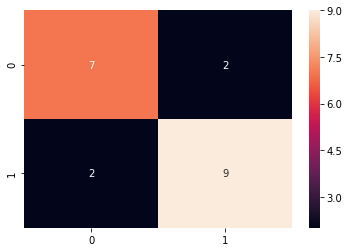

In [ ]:
matrix_dt_selected = confusion_matrix(y_test_selected, y_pred_dt_selected)
sns.heatmap(matrix_dt_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_dt_selected))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.82      0.82      0.82        11

   micro avg       0.80      0.80      0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20




#### Random Forest

In [ ]:
# for dataset
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state = x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# rf = RandomForestClassifier()
# score_rf = cross_val_score(rf, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf = round(np.mean(score_rf)*100, 2)

accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf)*100, 2)
recall_rf = round(recall_score(y_test, y_pred_rf)*100, 2)
f1_score_rf = round(f1_score(y_test, y_pred_rf)*100, 2)
roc_auc_rf = round(roc_auc_score(y_test_selected, y_pred_rf)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf)+" %")
print("Precision score of Random Forest: "+str(precision_rf)+" %")
print("Recall score of Random Forest: "+str(recall_rf)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf)+" %")

Accuracy score of Random Forest: 90.0 %
Precision score of Random Forest: 84.62 %
Recall score of Random Forest: 100.0 %
F1 score of Random Forest: 91.67 %
ROC AUC score of Random Forest: 88.89 %


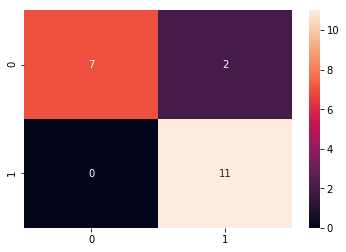

In [ ]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix_rf, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

   micro avg       0.90      0.90      0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
# for data_selected
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_selected,y_train_selected)
    y_pred_rf_selected = rf.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_rf_selected, y_test_selected)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_selected,y_train_selected)
y_pred_rf_selected = rf.predict(X_test_selected)

# rf = RandomForestClassifier()
# score_rf_selected = cross_val_score(rf, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf_selected = round(np.mean(score_rf_selected)*100, 2)

accuracy_rf_selected = round(accuracy_score(y_test_selected, y_pred_rf_selected)*100, 2)
precision_rf_selected = round(precision_score(y_test_selected, y_pred_rf_selected)*100, 2)
recall_rf_selected = round(recall_score(y_test_selected, y_pred_rf_selected)*100, 2)
f1_score_rf_selected = round(f1_score(y_test_selected, y_pred_rf_selected)*100, 2)
roc_auc_rf_selected = round(roc_auc_score(y_test_selected, y_pred_rf_selected)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf_selected)+" %")
print("Precision score of Random Forest: "+str(precision_rf_selected)+" %")
print("Recall score of Random Forest: "+str(recall_rf_selected)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf_selected)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf_selected)+" %")

In [ ]:
matrix_rf_selected = confusion_matrix(y_test_selected, y_pred_rf_selected)
sns.heatmap(matrix_rf_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_rf_selected))

#### Multi-Layer Perceptron

In [ ]:
# for dataset

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = round(accuracy_score(y_test, y_pred_mlp)*100, 2)
precision_mlp = round(precision_score(y_test, y_pred_mlp)*100, 2)
recall_mlp = round(recall_score(y_test, y_pred_mlp)*100, 2)
f1_score_mlp = round(f1_score(y_test, y_pred_mlp)*100, 2)
roc_auc_mlp = round(roc_auc_score(y_test_selected, y_pred_mlp)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp)+" %")

In [ ]:
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(matrix_mlp, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test, y_pred_mlp))

In [ ]:
# for data_selected

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13,13,13),max_iter=500)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train_selected,y_train_selected)
y_pred_mlp_selected = mlp.predict(X_test_selected)

accuracy_mlp_selected = round(accuracy_score(y_test_selected, y_pred_mlp_selected)*100, 2)
precision_mlp_selected = round(precision_score(y_test_selected, y_pred_mlp_selected)*100, 2)
recall_mlp_selected = round(recall_score(y_test_selected, y_pred_mlp_selected)*100, 2)
f1_score_mlp_selected = round(f1_score(y_test_selected, y_pred_mlp_selected)*100, 2)
roc_auc_mlp_selected = round(roc_auc_score(y_test_selected, y_pred_mlp_selected)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp_selected)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp_selected)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp_selected)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp_selected)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp_selected)+" %")

In [ ]:
matrix_mlp_selected = confusion_matrix(y_test_selected, y_pred_mlp_selected)
sns.heatmap(matrix_mlp_selected, annot = True, fmt = "d")

In [ ]:
print(classification_report(y_test_selected, y_pred_mlp_selected))

#### Scores

In [ ]:
# for dataset
accuracys = [accuracy_lr, accuracy_nb, score_knn, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_mlp]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Multi-Layer Perceptron"]    

for i in range(len(algorithms)):
    print("Accuracy score achieved using "+algorithms[i]+" is: "+str(accuracys[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('For Dataset', fontweight='bold')
sns.barplot(algorithms,accuracys)

In [ ]:
# for data_selected
accuracys_selected = [accuracy_lr_selected, accuracy_nb_selected, score_knn, accuracy_svm_selected, accuracy_dt_selected, accuracy_rf_selected, accuracy_mlp_selected]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Multi-Layer Perceptron"]    

for i in range(len(algorithms)):
    print("Accuracy accuracy achieved using "+algorithms[i]+" is: "+str(accuracys_selected[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('For Data Selected', fontweight='bold')

sns.barplot(algorithms,accuracys_selected)

## 6. Performance Comparison

In [ ]:
# for Dataset
algorithms = np.array(['Logistic Regression', 'Naive Bayes', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest', 'Multi-Layer Perceptron'])
scores = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

lr = [accuracy_lr, precision_lr, recall_lr, f1_score_lr, roc_auc_lr]
nb = [accuracy_nb, precision_nb, recall_nb, f1_score_nb, roc_auc_nb]
knn = [score_knn, score_knn, score_knn, score_knn, score_knn]
svm = [accuracy_svm, precision_svm, recall_svm, f1_score_svm, roc_auc_svm]
dt = [accuracy_dt, precision_dt, recall_dt, f1_score_dt, roc_auc_dt]
rf = [accuracy_rf, precision_rf, recall_rf, f1_score_rf, roc_auc_rf]
mlp = [accuracy_mlp, precision_mlp, recall_mlp, f1_score_mlp, roc_auc_mlp]

print("Evaluation of algorithms in test part of Dataset")
data = np.array([lr, nb, knn, svm, dt, rf, mlp])
pd.DataFrame(data, algorithms, scores)

In [ ]:
rcParams['figure.figsize'] = 16, 8

barWidth = 0.12
r1 = np.arange(len(lr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.bar(r1, lr, width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, nb, width=barWidth, edgecolor='white', label='NB')
plt.bar(r3, knn, width=barWidth, edgecolor='white', label='KNN')
plt.bar(r4, svm, width=barWidth, edgecolor='white', label='SVM')
plt.bar(r5, dt, width=barWidth, edgecolor='white', label='DT')
plt.bar(r6, rf, width=barWidth, edgecolor='white', label='RF')
plt.bar(r7, mlp, width=barWidth, edgecolor='white', label='MLP')

plt.xlabel('Performance Metrics', fontweight='bold')
plt.xticks([r+ .2 + barWidth for r in range(len(lr))], scores)
plt.ylabel('Scores', fontweight='bold')
plt.title('For Dataset', fontweight='bold')

plt.legend()
plt.show()

In [ ]:
# for data_selected
algorithms = np.array(['Logistic Regression', 'Naive Bayes', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest', 'Multi-Layer Perceptron'])
scores = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

lr_selected = [accuracy_lr_selected, precision_lr_selected, recall_lr_selected, f1_score_lr_selected, roc_auc_lr_selected]
nb_selected = [accuracy_nb_selected, precision_nb_selected, recall_nb_selected, f1_score_nb_selected, roc_auc_nb_selected]
knn_selected = [score_knn_selected, score_knn_selected, score_knn_selected, score_knn_selected, score_knn_selected]
svm_selected = [accuracy_svm_selected, precision_svm_selected, recall_svm_selected, f1_score_svm_selected, roc_auc_svm_selected]
dt_selected = [accuracy_dt_selected, precision_dt_selected, recall_dt_selected, f1_score_dt_selected, roc_auc_dt_selected]
rf_selected = [accuracy_rf_selected, precision_rf_selected, recall_rf_selected, f1_score_rf_selected, roc_auc_rf_selected]
mlp_selected = [accuracy_mlp_selected, precision_mlp_selected, recall_mlp_selected, f1_score_mlp_selected, roc_auc_mlp_selected]

print("Evaluation of algorithms in test part of Data Selected")
data_selected = np.array([lr_selected, nb_selected, knn_selected, svm_selected, dt_selected, rf_selected, mlp_selected])
pd.DataFrame(data_selected, algorithms, scores)

In [ ]:
rcParams['figure.figsize'] = 16, 8

barWidth = 0.12
r1 = np.arange(len(lr_selected))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.bar(r1, lr_selected, width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, nb_selected, width=barWidth, edgecolor='white', label='NB')
plt.bar(r3, knn_selected, width=barWidth, edgecolor='white', label='KNN')
plt.bar(r4, svm_selected, width=barWidth, edgecolor='white', label='SVM')
plt.bar(r5, dt_selected, width=barWidth, edgecolor='white', label='DT')
plt.bar(r6, rf_selected, width=barWidth, edgecolor='white', label='RF')
plt.bar(r7, mlp_selected, width=barWidth, edgecolor='white', label='MLP')

plt.xlabel('Performance Metrics', fontweight='bold')
plt.xticks([r+ .2 + barWidth for r in range(len(lr))], scores)
plt.ylabel('Scores', fontweight='bold')
plt.title('For Data Selected', fontweight='bold')

plt.legend()
plt.show()
